- Link data set: https://www.kaggle.com/datasets/uciml/autompg-dataset

In [4]:
#library(dplyr)
library(car)
library(MASS)
library(caret)
options(warn = -1)
set.seed(42)

In [5]:
# Đường dẫn tới file hiện tại
base_path <- getwd()
setwd(base_path)

In [6]:
# Đường dẫn lưu trữ dữ liệu
path <- paste(base_path, "datasets/auto-mpg_data.csv", sep = "/")
# Gán dữ liệu vào biến df
df <- read.csv(path,header = FALSE, sep = "")
# Đổi tên cột dữ liệu
names(df) <- c("mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "modelyear", "origin", "carname")
# # # Xem 6 dòng đầu tiên của dữ liệu
head(df)


,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,carname
,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>
1,18,8,307,130.0,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165.0,3693,11.5,70,1,buick skylark 320
3,18,8,318,150.0,3436,11.0,70,1,plymouth satellite
4,16,8,304,150.0,3433,12.0,70,1,amc rebel sst
5,17,8,302,140.0,3449,10.5,70,1,ford torino
6,15,8,429,198.0,4341,10.0,70,1,ford galaxie 500


### Thông tin của bộ dữ liệu
- V1: mpg: continuous
- V2: cylinders: multi-valued discrete
- V3: displacement: continuous
- V4: horsepower: continuous
- V5: weight: continuous
- V6: acceleration: continuous
- V7: model year: multi-valued discrete
- V8: origin: multi-valued discrete
- V9: car name: string (unique for each instance)


In [7]:
# Kiểm tra số dòng và số cột của dữ liệu:
dim(df)

[1] 398   9

In [8]:
# Kiểm tra dữ liệu
str(df) # Xem cấu trúc dữ liệu


'data.frame':	398 obs. of  9 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : int  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : chr  "130.0" "165.0" "150.0" "150.0" ...
 $ weight      : num  3504 3693 3436 3433 3449 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ modelyear   : int  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ carname     : chr  "chevrolet chevelle malibu" "buick skylark 320" "plymouth satellite" "amc rebel sst" ...


In [9]:
# Kiểm tra dữ liệu unique của bộ dữ liệu
for (col in colnames(df)) {
    print(col)
    print(length(unique(df[[col]])))
}


[1] "mpg"
[1] 129
[1] "cylinders"
[1] 5
[1] "displacement"
[1] 82
[1] "horsepower"
[1] 94
[1] "weight"
[1] 351
[1] "acceleration"
[1] 95
[1] "modelyear"
[1] 13
[1] "origin"
[1] 3
[1] "carname"
[1] 305


### Nhận xét về dữ liệu:
- Cột V2: cylinders Số Xilanh: Có 5 giá trị unique: Đây là một biến phân loại, cần as factor biến này
- Cột V4: horsepower: mã lực là một biến số liên tục, trong bộ dữ liệu đang có dạng str nên cần chuyển thành dạng numeric cho biến này
- Cột V7: model year: có 13 giá trị unique, đây là biến phân loại, cần as factor biến này
- Cột V8: origin: Xuất xứ: có 3 giá trị unique, đây là biến phân loại, cần as factor biến này
- Cột V9: carname: Là tên của các loại xe, dữ liệu này không có ý nghĩa cho việc phân tích, nên loại biến carname này ra khỏi bộ dữ liệu

In [10]:
# Loại cột carname
df <- subset(df, select = -carname)

In [11]:
# Chuyển dữ liệu cột V4: horsepower thành dạng numeric
df$horsepower = as.numeric(df$horsepower)

In [12]:
# Phân loại dữ liệu liên tục và rời rạc:
list_ltuc = c("mpg", "displacement", "horsepower", "weight", "acceleration")
list_ploai = c("cylinders","modelyear","origin")

In [13]:
# Kiểm tra giá trị thiếu
colSums(is.na(df))


mpg    cylinders displacement   horsepower       weight acceleration 
           0            0            0            6            0            0 
   modelyear       origin 
           0            0

- Cột horsepower có 6 giá trị bị thiếu: Chiếm 6/398*100 = 1.50753768844221%, đây là một tỉ lệ nhỏ nên ta có thể loại bỏ những dòng dữ liệu này khỏi bộ dữ liệu

In [14]:
# Xoá bỏ dữ liệu na
df <- na.omit(df)
# Kiểm tra lại số dòng và số cột sau khi đã loại bỏ na
dim(df)

[1] 392   8

In [15]:
## Phân chia bộ dữ liệu thành 2 tập train.data và test.data
set.seed(42)
sample <- sample(c(TRUE, FALSE), nrow(df), replace=TRUE, prob=c(0.8,0.2))
train.data  <- df[sample, ]
test.data   <- df[!sample, ]
dim(train.data)
dim(test.data)

[1] 313   8

[1] 79  8

### XỬ LÝ BIẾN LIÊN TỤC

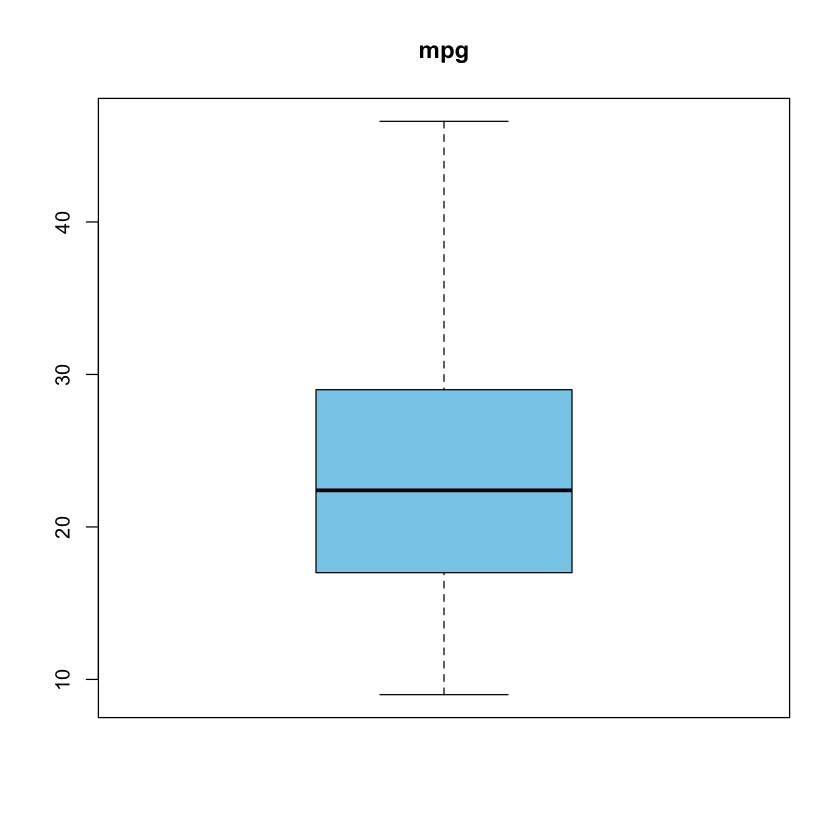

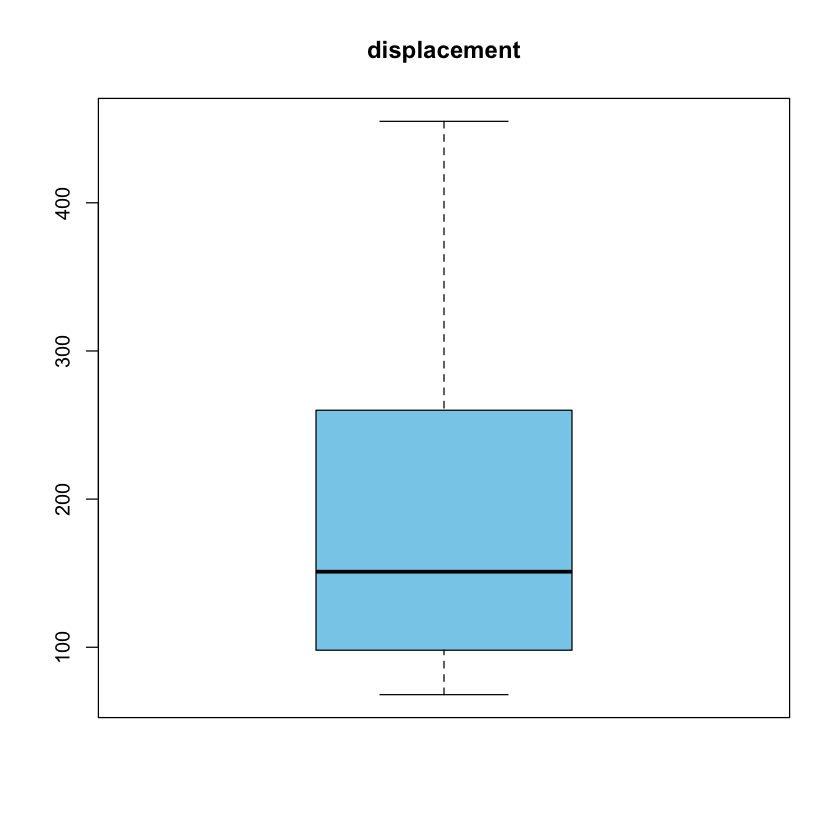

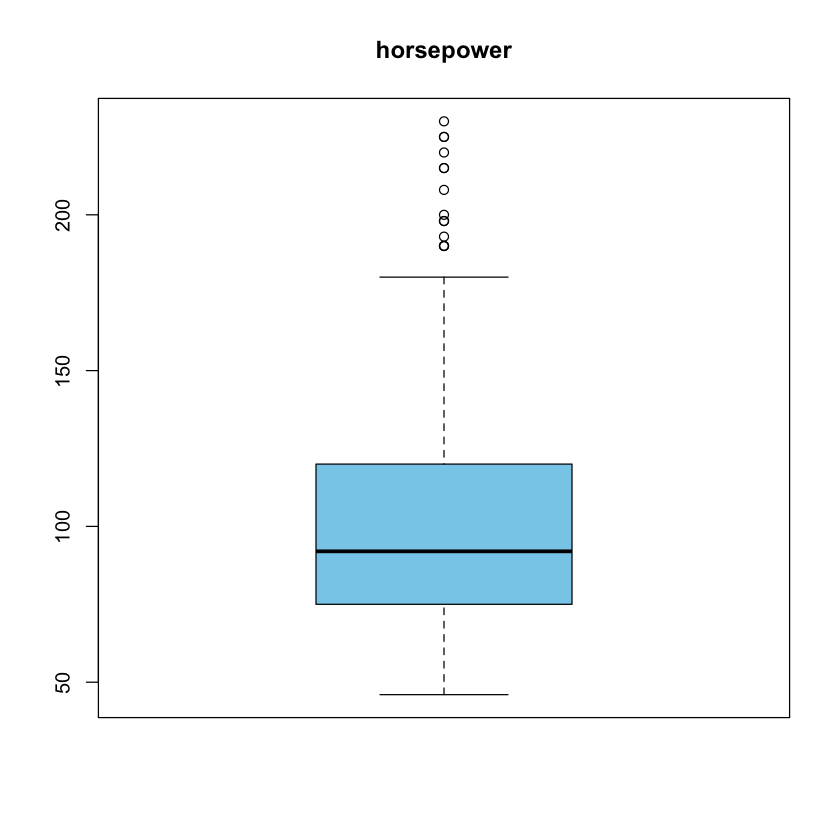

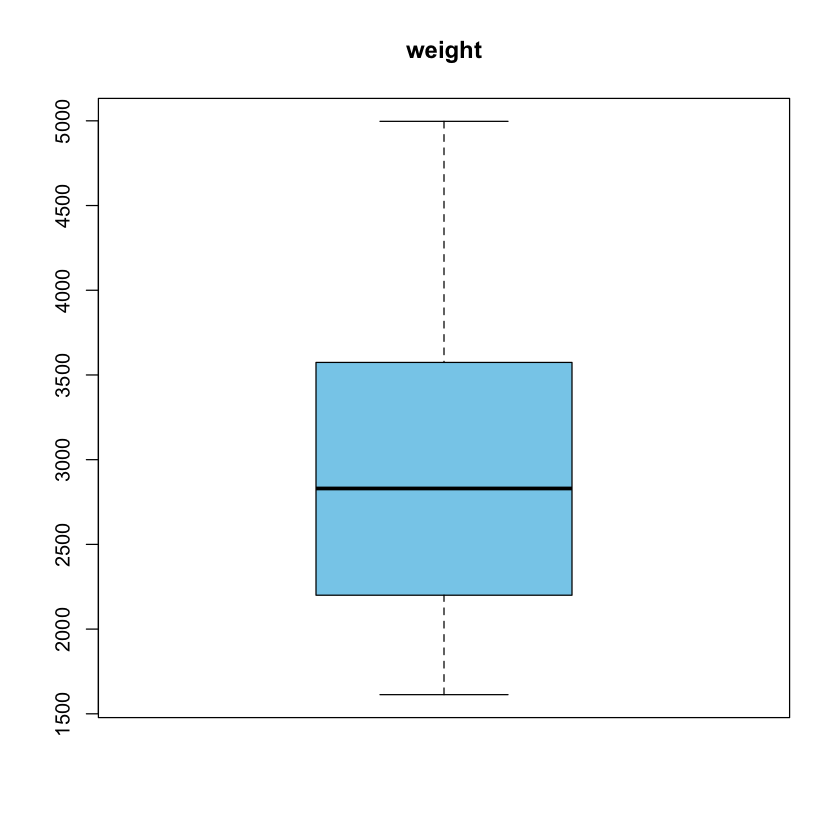

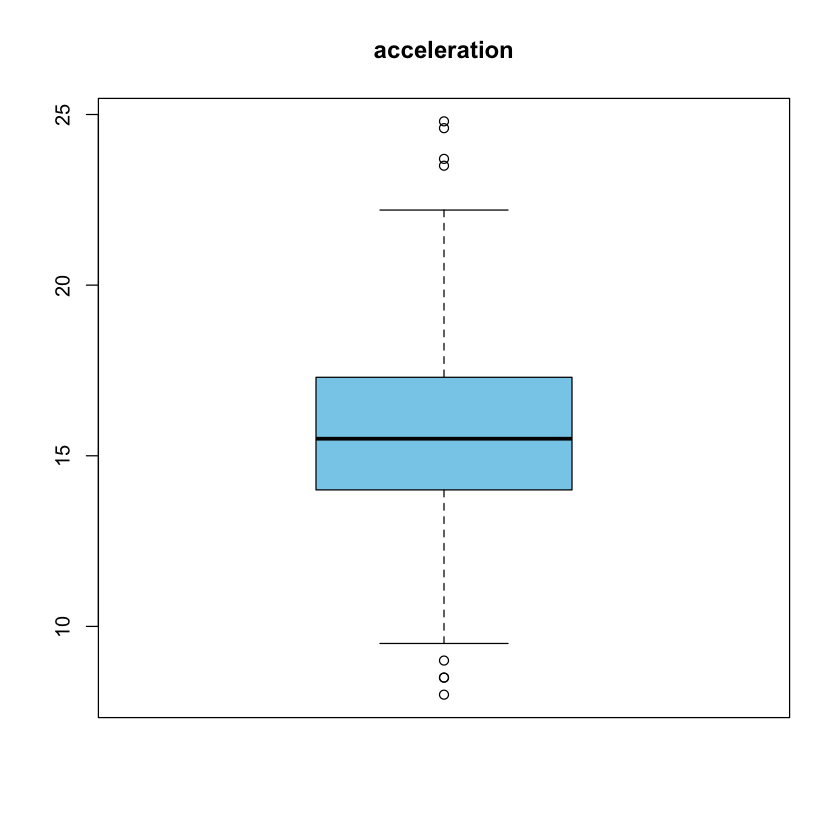

In [16]:
# Vẽ Boxplot cho dữ liệu liên tục:
for (col in list_ltuc) {
    boxplot(train.data[[col]], col = "skyblue", main = col)
}


- Dữ liệu tồn tại giá trị ngoại lai

In [17]:
# Lưu tất cả dữ liệu ngoại lai vào outlier_df
outlier_df <- data.frame()
for (col in list_ltuc) {
    Q1 <- quantile(train.data[[col]], 0.25)
    Q3 <- quantile(train.data[[col]], 0.75)
    IQR <- Q3 - Q1
    outliers <- df[train.data[[col]] < (Q1 - 1.5 * IQR) | train.data[[col]] > (Q3 + 1.5 * IQR), ]
    n_out <- nrow(outliers)
    print(paste("So outlier cua cot ", col, ": ", n_out))
    outlier_df <- rbind(outlier_df, outliers)
}
print(paste("Tong so outlier cua train.data: ", nrow(unique(outlier_df))))


[1] "So outlier cua cot  mpg :  0"
[1] "So outlier cua cot  displacement :  0"
[1] "So outlier cua cot  horsepower :  26"
[1] "So outlier cua cot  weight :  0"
[1] "So outlier cua cot  acceleration :  13"
[1] "Tong so outlier cua train.data:  33"


In [18]:
# Xem các dòng có giá trị ngoại lai
outlier_df = unique(outlier_df)
outlier_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
3,18.0,8,318,150,3436,11.0,70,1
4,16.0,8,304,150,3433,12.0,70,1
5,17.0,8,302,140,3449,10.5,70,1
6,15.0,8,429,198,4341,10.0,70,1
7,14.0,8,454,220,4354,9.0,70,1
10,15.0,8,390,190,3850,8.5,70,1
17,18.0,6,199,97,2774,15.5,70,1
18,21.0,6,200,85,2587,16.0,70,1
19,27.0,4,97,88,2130,14.5,70,3


- Có toàn bộ 33 dòng có outlier trong toàn bộ dữ liệu, chiếm 33/313*100 = 10.5%, với tỉ lệ này => Ta có thể loại bỏ các dòng outlier này ra khỏi bộ dữ liệu 

In [19]:
# Loại bỏ dữ liệu ngoại lai:
# Lấy các chỉ số hàng có outlier
outlier_indices = as.numeric(rownames(outlier_df))
# outlier_indices
train.data <- train.data[-outlier_indices, ]
dim(train.data)

[1] 294   8

In [20]:
# Ma trận tương quan R của dữ liệu
R <- cor(train.data[,list_ltuc])
R

,mpg,displacement,horsepower,weight,acceleration
mpg,1.0000000,-0.7975867,-0.7796592,-0.8239245,0.4195107
displacement,-0.7975867,1.0000000,0.8876205,0.9374277,-0.4774265
horsepower,-0.7796592,0.8876205,1.0000000,0.8672309,-0.6735949
weight,-0.8239245,0.9374277,0.8672309,1.0000000,-0.3705755
acceleration,0.4195107,-0.4774265,-0.6735949,-0.3705755,1.0000000


In [21]:
df_ltuc = train.data[,list_ltuc]

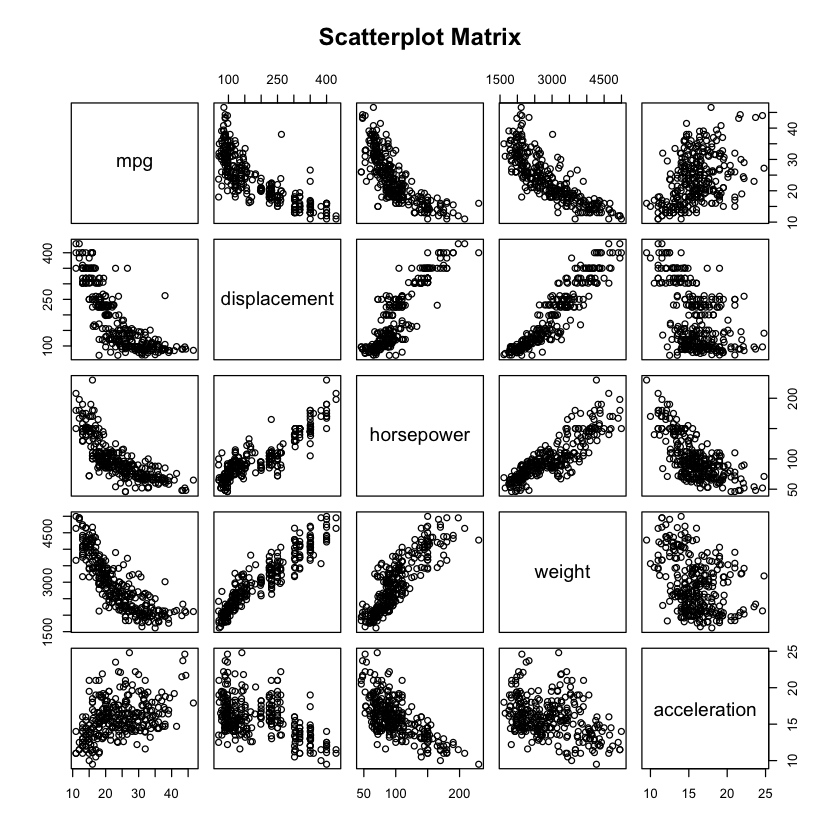

In [22]:
# Vẽ biểu đồ Scatterplot cho toàn bộ các cột dữ liệu
pairs(df_ltuc, main = "Scatterplot Matrix")

In [23]:
mod_reg = lm(mpg ~., data = df_ltuc)
summary(mod_reg)


Call:
lm(formula = mpg ~ ., data = df_ltuc)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.8847  -2.9182  -0.3879   2.4929  16.0120 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  42.624491   3.139001  13.579  < 2e-16 ***
displacement -0.003374   0.008155  -0.414    0.679    
horsepower   -0.038174   0.023184  -1.647    0.101    
weight       -0.005783   0.001035  -5.587 5.34e-08 ***
acceleration  0.164074   0.156171   1.051    0.294    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.271 on 289 degrees of freedom
Multiple R-squared:  0.6974,	Adjusted R-squared:  0.6932 
F-statistic: 166.5 on 4 and 289 DF,  p-value: < 2.2e-16


In [24]:
vif(mod_reg)

displacement   horsepower       weight acceleration 
   10.292108    10.047374    11.616962     2.805565

- Biến weifht có chỉ số Vif = 11.62 > 10 => Tồn tại hiện tượng đa cộng tuyến đối, do đó loại bỏ biến weight khỏi bộ dữ liệu

In [25]:
# Loại cột weight
df_ltuc <- subset(df_ltuc, select = -weight)
mod_reg = lm(mpg ~., data = df_ltuc)
summary(mod_reg)


Call:
lm(formula = mpg ~ ., data = df_ltuc)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.5869  -3.3085  -0.5287   2.2554  16.2363 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  44.916196   3.270171  13.735  < 2e-16 ***
displacement -0.034821   0.006201  -5.615 4.59e-08 ***
horsepower   -0.101884   0.021211  -4.803 2.51e-06 ***
acceleration -0.275726   0.141730  -1.945   0.0527 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.488 on 290 degrees of freedom
Multiple R-squared:  0.6648,	Adjusted R-squared:  0.6613 
F-statistic: 191.7 on 3 and 290 DF,  p-value: < 2.2e-16


In [26]:
vif(mod_reg)

displacement   horsepower acceleration 
    5.389027     7.616516     2.092689

- Sau khi loại khỏi biến weight ra khỏi bộ dữ liệu train data, ta thấy rằng chỉ số Vif của các biến còn lại < 10, do đó ta có thể sử dụng các biến này trong mô hình dự đoán

### XỬ LÝ BIẾN PHÂN LOẠI

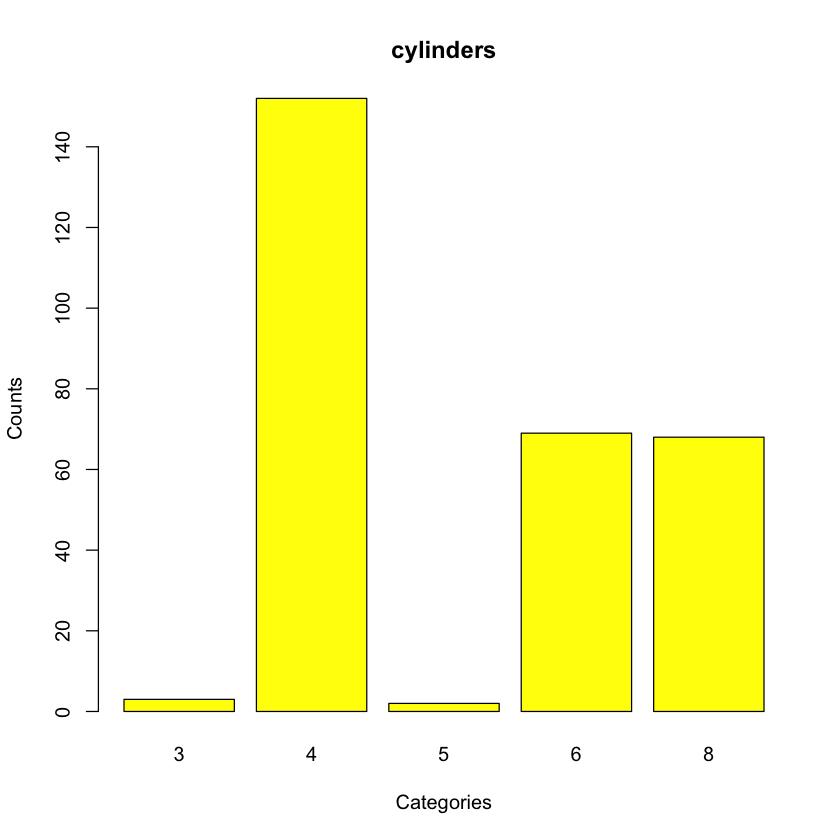

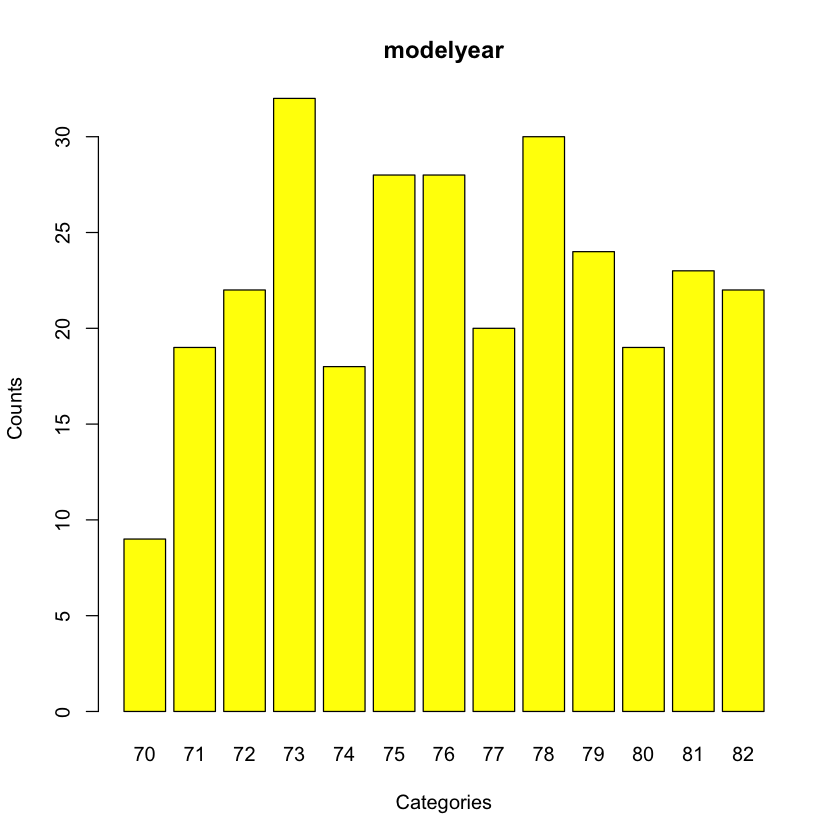

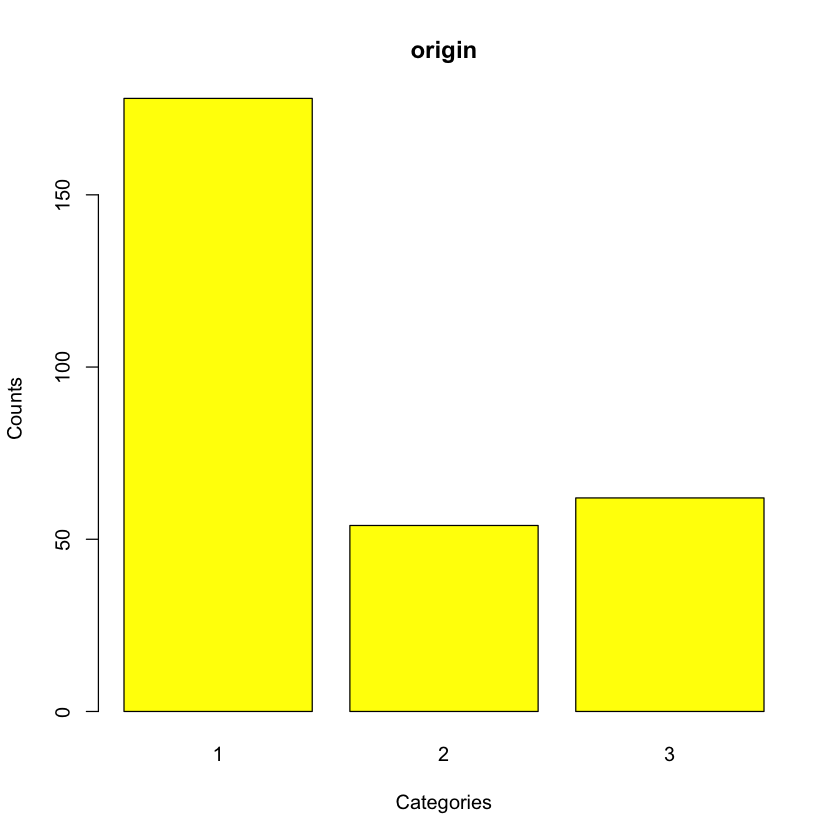

In [27]:
# Vẽ bar plot cho các biến phân loại
for (col in list_ploai){
    # Tạo bảng tần suất
    counts <- table(train.data[[col]])
    # Vẽ biểu đồ cột
    barplot(counts, main = col, xlab = "Categories", ylab = "Counts", col = "yellow")
}



#### Nhận xét biến phân loại:
- Đối với biến cylinders: giá trị 4 có tỉ lệ cao nhất, do đó chọn 4 làm ref cho biến này
- Đối với biến modelyear, giá trị 73 có tỉ lệ cao nhất, do đó chọn 73 làm ref cho biến này
- Đối với biêns origin, giá trị 1 có tỉ lệ cao nhất, do đó chọn 1 làm ref cho biến này

#### Lý do chọn biến có tần suất cao nhất:
- 1. Diễn giải dễ hiểu hơn
Tính chất cơ sở: Khi chọn mức có tần suất cao nhất làm mức tham chiếu, các hệ số hồi quy của các mức khác được diễn giải so với mức phổ biến nhất. Điều này thường làm cho việc diễn giải kết quả mô hình dễ hiểu hơn.
- 2. Tăng cường tính ổn định của mô hình
Ổn định số liệu: Mức tham chiếu có tần suất cao nhất giúp tăng cường tính ổn định của các ước lượng trong mô hình, vì nó thường dựa trên nhiều quan sát hơn. Điều này có thể dẫn đến các ước lượng ít biến động hơn và các khoảng tin cậy hẹp hơn.
- 3. Tăng cường độ tin cậy của ước lượng
Độ tin cậy: Với mức tham chiếu có tần suất cao nhất, các hệ số hồi quy của các mức khác sẽ có độ tin cậy cao hơn vì chúng dựa trên một nhóm dữ liệu lớn hơn. Điều này làm giảm sai số chuẩn của các hệ số ước lượng và tăng độ chính xác của các kiểm định thống kê.

In [28]:
## Loại weight ra khỏi train.data
train.data <- subset(train.data, select = -weight)

In [29]:
## As factor 3 biến phân loại:
for (col in list_ploai){
    train.data[[col]] = as.factor(train.data[[col]])
}

In [30]:
# Lựa chọn ref cho biến phân loại:
# cylinders: 4
# modelyear: 73
# origin: 1
ref_dict <- c(cylinders = "4", modelyear = "73", origin = "1")
## As factor 3 biến phân loại với ref là giá trị có mod cao nhất:
for (col in list_ploai){
    train.data[[col]] = relevel(train.data[[col]], ref = ref_dict[col])
}


In [31]:
# Xem lại bộ dữ liệu
str(train.data)

'data.frame':	294 obs. of  7 variables:
 $ mpg         : num  18 17 15 24 21 27 26 24 21 28 ...
 $ cylinders   : Factor w/ 5 levels "4","3","5","6",..: 5 5 5 1 4 1 1 1 4 1 ...
 $ displacement: num  318 302 383 113 200 97 97 107 199 140 ...
 $ horsepower  : num  150 140 170 95 85 88 46 90 90 90 ...
 $ acceleration: num  11 10.5 10 15 16 14.5 20.5 14.5 15 15.5 ...
 $ modelyear   : Factor w/ 13 levels "73","70","71",..: 2 2 2 2 2 2 2 2 2 3 ...
 $ origin      : Factor w/ 3 levels "1","2","3": 1 1 1 3 1 3 2 2 1 1 ...


In [32]:
res.lm <- lm(mpg ~., data = train.data)
step_model <- stepAIC(res.lm, direction = "both", trace = FALSE)
step_model


Call:
lm(formula = mpg ~ cylinders + displacement + horsepower + acceleration + 
    modelyear + origin, data = train.data)

Coefficients:
 (Intercept)    cylinders3    cylinders5    cylinders6    cylinders8  
     39.0385       -8.9305       -4.6111       -3.4579       -0.4170  
displacement    horsepower  acceleration   modelyear70   modelyear71  
     -0.0163       -0.1033       -0.2637        0.4932        1.5358  
 modelyear72   modelyear74   modelyear75   modelyear76   modelyear77  
     -0.5307        0.9159        0.2461        0.9739        2.8355  
 modelyear78   modelyear79   modelyear80   modelyear81   modelyear82  
      3.4592        4.3491        7.8526        5.8114        7.7196  
     origin2       origin3  
      1.1229        2.3956  


In [33]:
summary(step_model)


Call:
lm(formula = mpg ~ cylinders + displacement + horsepower + acceleration + 
    modelyear + origin, data = train.data)

Residuals:
   Min     1Q Median     3Q    Max 
-6.965 -1.955 -0.223  1.572 12.235 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  39.038483   2.621602  14.891  < 2e-16 ***
cylinders3   -8.930484   1.988033  -4.492 1.04e-05 ***
cylinders5   -4.611070   2.394632  -1.926 0.055198 .  
cylinders6   -3.457920   0.889464  -3.888 0.000127 ***
cylinders8   -0.416963   1.583217  -0.263 0.792469    
displacement -0.016296   0.008756  -1.861 0.063800 .  
horsepower   -0.103323   0.016865  -6.127 3.14e-09 ***
acceleration -0.263719   0.104916  -2.514 0.012528 *  
modelyear70   0.493250   1.225560   0.402 0.687655    
modelyear71   1.535801   0.939856   1.634 0.103399    
modelyear72  -0.530736   0.904984  -0.586 0.558053    
modelyear74   0.915869   0.969722   0.944 0.345769    
modelyear75   0.246057   0.849169   0.290 0.772219    
modely

In [34]:
vif(step_model)

,GVIF,Df,GVIF^(1/(2*Df))
cylinders,18.316473,4,1.438319
displacement,21.132025,1,4.596958
horsepower,9.469758,1,3.077297
acceleration,2.255403,1,1.501800
modelyear,1.804319,12,1.024896
origin,2.463692,2,1.252843


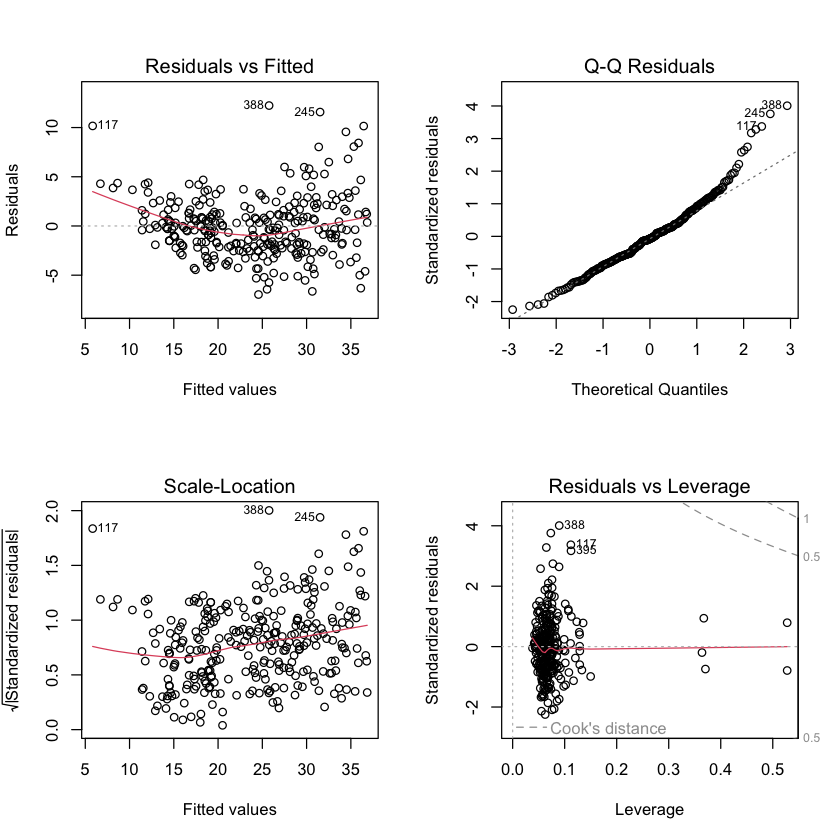

In [35]:
# Plot residuals
par(mfrow = c(2, 2))
plot(step_model)


In [36]:
AIC(step_model)

[1] 1541.367